In [1]:
import pandas as pd

df = pd.read_csv('../results/sift-benchmark.csv')
df['method'] = 'top_l_range'



In [2]:
threshold_df = pd.read_csv('../results/sift-benchmark-threshold.csv')
threshold_df['method'] = 'threshold'

In [3]:
plot_df = pd.concat([df, threshold_df])

plot_df.head()

,query_time,recall,g_range,l_range,method,threshold
0,0.020452,0.2572,3,1.0,top_l_range,NaN
1,0.040461,0.3400,3,3.0,top_l_range,NaN
2,0.056097,0.3626,3,5.0,top_l_range,NaN
3,0.068281,0.3690,3,7.0,top_l_range,NaN
4,0.032387,0.3511,5,1.0,top_l_range,NaN


<Axes: xlabel='recall', ylabel='query_time'>

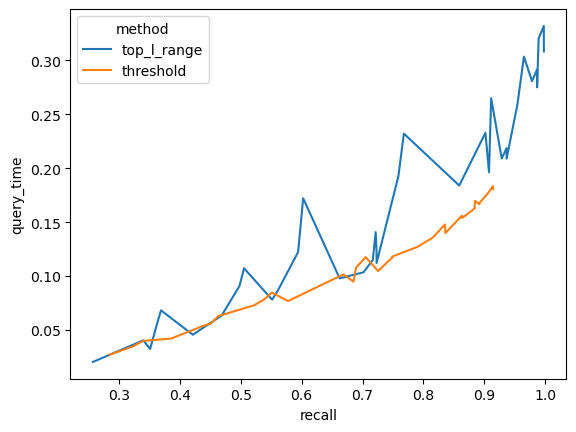

In [4]:
import seaborn as sns

sns.lineplot(data=plot_df, x="recall", y="query_time", hue="method")

<Axes: xlabel='recall', ylabel='query_time'>

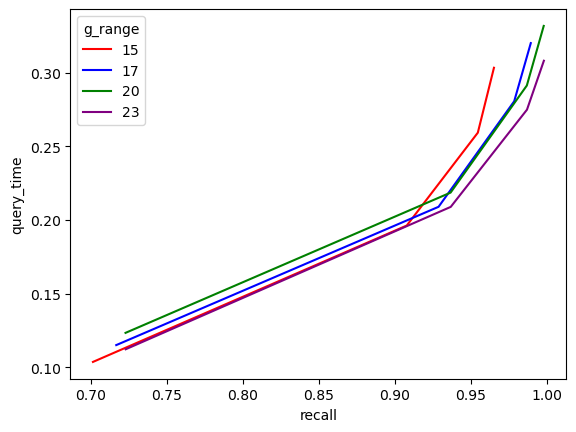

In [15]:
sns.lineplot(data=df.query('g_range > 13'), x="recall", y="query_time", hue="g_range", palette=["red", "blue", "green", "purple"])

<Axes: xlabel='recall', ylabel='query_time'>

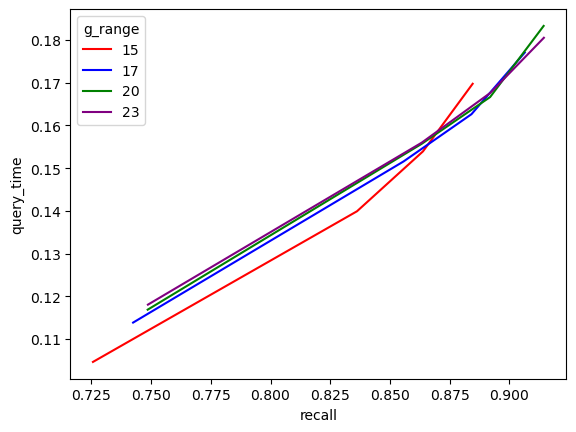

In [14]:
sns.lineplot(data=threshold_df.query('g_range > 13'), x="recall", y="query_time", hue="g_range", palette=["red", "blue", "green", "purple"])


<Axes: xlabel='recall', ylabel='query_time'>

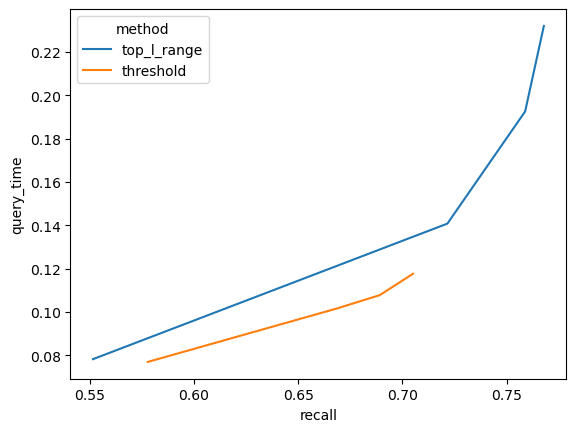

In [7]:


sns.lineplot(data=plot_df[plot_df['g_range'] == 10], x="recall", y="query_time", hue="method")